In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_excel("myexcel.xlsx")

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [5]:
file.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

Correcting the data in the "height" column by replacing it with random numbers between 150 and 180.

In [3]:
file['Height'] = np.random.randint(150,181,size=len(file))

In [11]:
file.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,157,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,178,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,154,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,180,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,154,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,169,240,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,179,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,176,238,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12,PG,22,156,190,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36,PG,22,160,220,Oklahoma State,3431040.0


In [25]:
# Filling null values in the Salary column with the mean salary
file.fillna({'Salary': file['Salary'].mean()},inplace=True)

# Set pandas to display numbers in normal decimal notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
# Filling null values in the College column with "Unknown"
file.fillna({'College':"Unknown"}, inplace=True)

In [26]:
file.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age Group
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.00,25-30
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.00,25-30
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,4833969.55,25-30
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.00,19-24
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,Unknown,5000000.00,25-30
5,Amir Johnson,Boston Celtics,90,PF,29,2023-09-06 00:00:00,240,Unknown,12000000.00,25-30
6,Jordan Mickey,Boston Celtics,55,PF,21,2023-08-06 00:00:00,235,LSU,1170960.00,19-24
7,Kelly Olynyk,Boston Celtics,41,C,25,7-0,238,Gonzaga,2165160.00,25-30
8,Terry Rozier,Boston Celtics,12,PG,22,2023-02-06 00:00:00,190,Louisville,1824360.00,19-24
9,Marcus Smart,Boston Celtics,36,PG,22,2023-04-06 00:00:00,220,Oklahoma State,3431040.00,19-24


1. Determining the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

                      Team  Employee_Count  Employee_Percentage
0     New Orleans Pelicans              19             4.148472
1        Memphis Grizzlies              18             3.930131
2                Utah Jazz              16             3.493450
3          New York Knicks              16             3.493450
4          Milwaukee Bucks              16             3.493450
5            Brooklyn Nets              15             3.275109
6   Portland Trail Blazers              15             3.275109
7    Oklahoma City Thunder              15             3.275109
8           Denver Nuggets              15             3.275109
9       Washington Wizards              15             3.275109
10              Miami Heat              15             3.275109
11       Charlotte Hornets              15             3.275109
12           Atlanta Hawks              15             3.275109
13       San Antonio Spurs              15             3.275109
14         Houston Rockets              

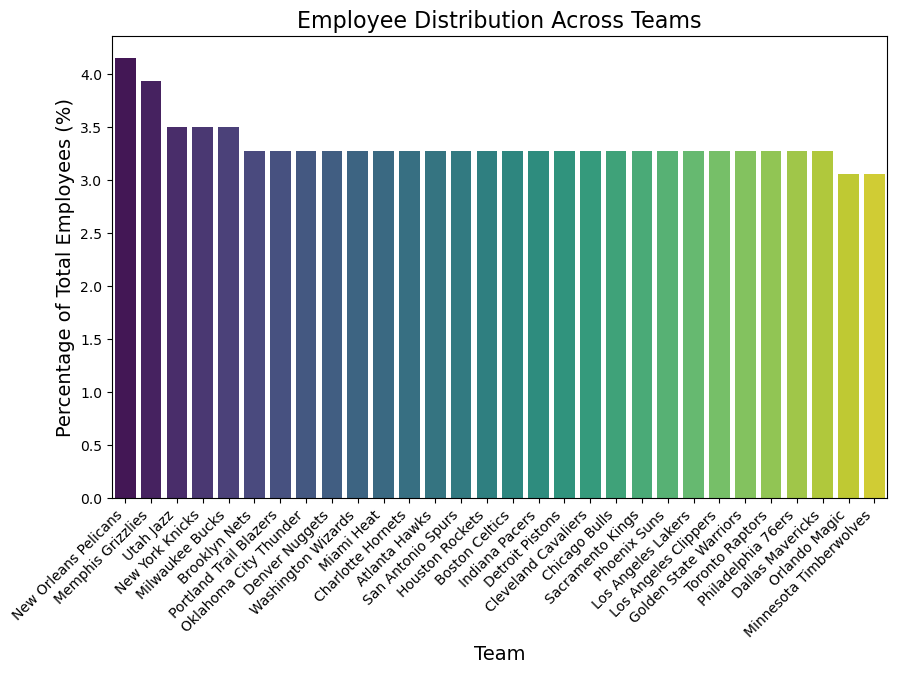

In [8]:
team_distribution = file['Team'].value_counts().reset_index()

team_distribution.columns = ['Team', 'Employee_Count'] #Two columns created
#print(team_distribution)

total_employees = team_distribution['Employee_Count'].sum() #total sum of employee count

#A new column of employee_percentage
team_distribution['Employee_Percentage'] = (team_distribution['Employee_Count'] / total_employees) * 100 
print(team_distribution) # A new DF with 3 columns

#For Visualization

plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Employee_Percentage', data=team_distribution, hue='Team',palette='viridis')

plt.title('Employee Distribution Across Teams', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Percentage of Total Employees (%)', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()

Insights: The graph clearly depicts that the team "New Orleans Pelicans" has the highest number of players. Both "Orlando Magic" and "Minnesota Timberwolves" contributes for the lowest number of employees.

 2.Segregate employees based on their positions within the company.

  Position  Employee_Count
0       SG             102
1       PF             100
2       PG              92
3       SF              85
4        C              79


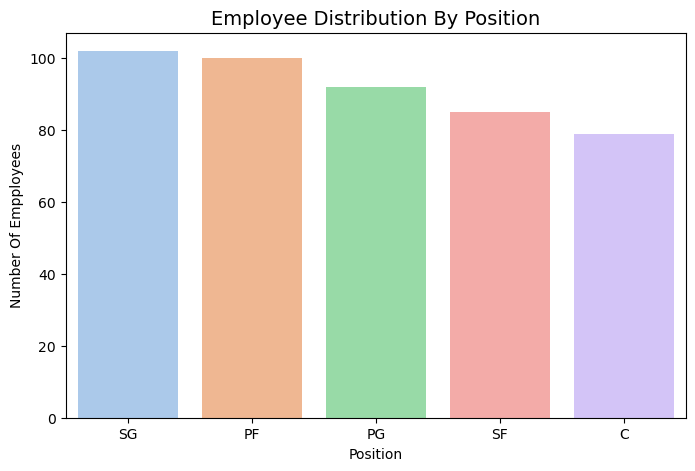

In [13]:
position_distriibution = file['Position'].value_counts().reset_index()
position_distriibution.columns = ['Position', 'Employee_Count']
print(position_distriibution)

#For Visualization

plt.figure(figsize=(8,5), dpi=100)

plt.title("Employee Distribution By Position", fontsize=14)

sns.barplot(x='Position', y='Employee_Count', data=position_distriibution, palette='pastel', hue= 'Position')

plt.xlabel('Position')
plt.ylabel('Number Of Empployees')

plt.xticks(x=position_distriibution.Position)
plt.yticks(y=position_distriibution.Employee_Count)

plt.show()

Insights: The most number of employees come under "SG" and least under "C".

In [ ]:
3.Identifying the predominant age group among employees. 

Age Group column after counting:
Age Group
19-24    152
25-30    213
31-36     78
37-40     13
Name: count, dtype: int64
Predominant Age Group: 25-30


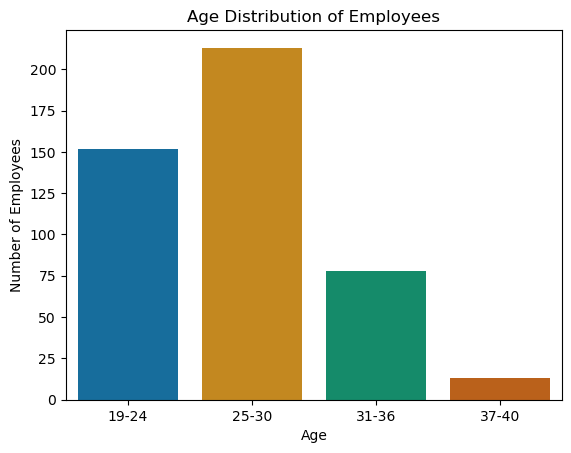

In [4]:
bins = [19,24,30,36,40] 
labels = ['19-24', '25-30','31-36','37-40'] #intervals

file['Age Group'] = pd.cut(file['Age'], bins=bins, labels=labels, right=True)
#print(file['Age Group'])

age_group_counts = file['Age Group'].value_counts().sort_index()
print("Age Group column after counting:")
print(age_group_counts)

predominant_age_group = age_group_counts.idxmax()
print("Predominant Age Group:", predominant_age_group)

#For Visualization
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='colorblind', hue=age_group_counts.index)

plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Number of Employees')

plt.show()


Insights: The most common age group is in the range of "25-30", which are the mid-range younger ones. The least 
employees is seen in the range of "37-40".

In [ ]:
4. Discovering which team and position have the highest salary expenditure.

Team: Los Angeles Lakers, Position: SF, Highest Salary Expenditure: 31866445.0


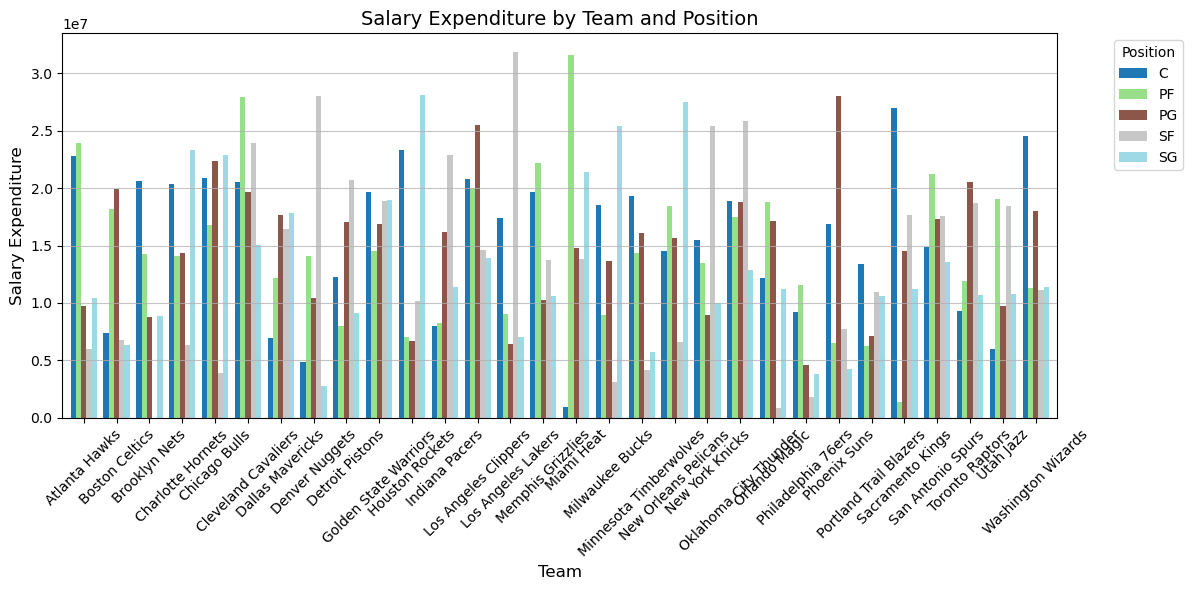

In [5]:
team_position_salary = file.groupby(['Team','Position'])['Salary'].sum().reset_index()
#print(team_position_salary)

highest_salary = team_position_salary.iloc[team_position_salary['Salary'].idxmax()]
#print(highest_salary)

print(f"Team: {highest_salary['Team']}, Position: {highest_salary['Position']}, Highest Salary Expenditure: {highest_salary['Salary']}")


# Pivot the DataFrame to get positions as columns
pivot_table = team_position_salary.pivot(index='Team', columns='Position', values='Salary').fillna(0)

# Plotting the grouped bar chart
pivot_table.plot(kind='bar', figsize=(12, 6), colormap='tab20', width=0.8)

# Adding titles and labels
plt.title('Salary Expenditure by Team and Position', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Salary Expenditure', fontsize=12)
plt.xticks(rotation=45)  # Rotate team names for better visibility
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Insights: The team "Los Angeles Lakers" has the highest salary expenditure.

5.Investigate if there's any correlation between age and salary, and represent it visually.

Correlation between Age and Salary: 0.21400941226570971


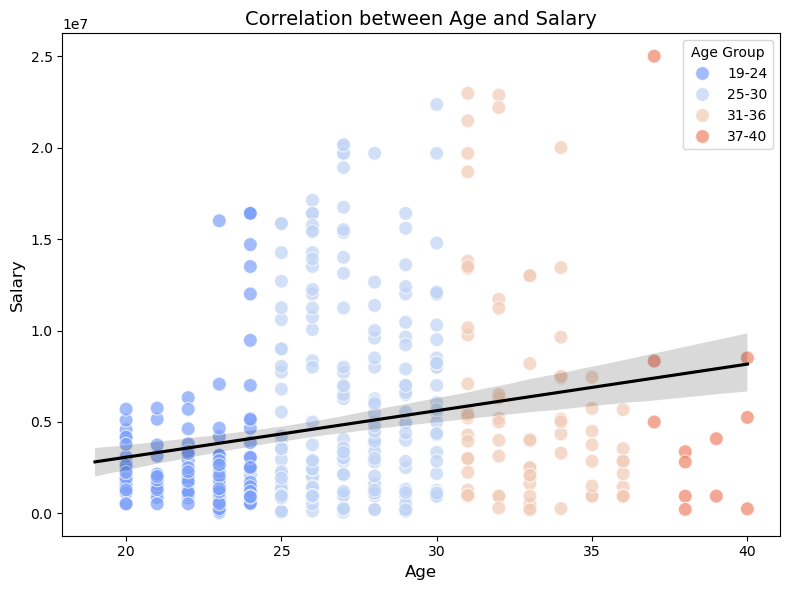

In [7]:
# Calculate the correlation between Age and Salary
correlation = file['Age'].corr(file['Salary'])

# Print the correlation coefficient
print(f"Correlation between Age and Salary: {correlation}")

plt.figure(figsize=(8, 6),dpi=100)
sns.scatterplot(x=file['Age'], y=file['Salary'], hue=file['Age Group'], palette='coolwarm', s=100, alpha=0.7, edgecolor='w')

# Add a trend line for better visual insight (regression line)
sns.regplot(x=file['Age'], y=file['Salary'], scatter=False, color='black')

# Add titles and labels
plt.title('Correlation between Age and Salary', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)

plt.xticks(x=file.Age)
plt.yticks(y=file.Salary)
# Show the plot
plt.tight_layout()
plt.show()


Insights: A correlation of 0.214 indicates a weak positive correlation between age and salary. This means that there is a slight tendency for salary to increase as age increases, the relationship is not very strong.